In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import pathlib
import ast
import scipy.stats
from scipy.stats import pearsonr

In [2]:
from bci_plot.utils import data_util
from bci_plot.metadata import sessions_info_w_day

In [3]:
datadir = pathlib.Path('/data/raspy/')
sessions = [item[0] for item in sessions_info_w_day.sessions_info]

In [14]:
rsx = []
rsy = []
rsxt = []
rsyt = []
for session in sessions:
    task_data = data_util.load_data(datadir / session / 'task.bin')
    gaze_data = data_util.load_data(datadir / session / 'gaze.bin')
    
    
    avg_gaze = 0.5*gaze_data['gaze_buffer'][:, 2:4] + 0.5*gaze_data['gaze_buffer'][:, 17:19]
    
    n_gaze = len(avg_gaze)
    #f = scipy.interpolate.interp1d(np.nonzero(~gaze_is_nan)[0], avg_gaze[~gaze_is_nan], fill_value='extrapolate', axis=0)
    #avg_gaze_interpolated = f(np.arange(len(avg_gaze)))
    
    cursor_pos = task_data['decoded_pos']
    target_pos = task_data['target_pos']
    render_angle = task_data['render_angle']
    rendered_cursor_pos = np.array([cp.reshape((1, 2))@np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]).T for \
                                    cp, theta in zip(cursor_pos, render_angle/180*np.pi)])
    rendered_cursor_pos = rendered_cursor_pos[:, 0, 0, :]
    rendered_target_pos = np.array([tp.reshape((1, 2))@np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]).T for \
                                    tp, theta in zip(target_pos, render_angle/180*np.pi)])
    rendered_target_pos = rendered_target_pos[:, 0, 0, :]
    rendered_target_loc = (4*np.arctan2(rendered_target_pos[:, 1], rendered_target_pos[:, 0])/np.pi).astype('int') % 8
    
    # topleft at xy (492, 91)
    # bottom right at xy (1426, 1025)
    # resolution is (1920, 1080)
    xcent = 0.5*(492 + 1426) / 1920
    xl = 1426 / 1920 - xcent
    ycent = 0.5*(91 + 1025) / 1080
    yl = 91 / 1080 - ycent
    normalized_gaze = np.zeros_like(avg_gaze)
    normalized_gaze[:, 0] = (avg_gaze[:, 0] - xcent)/xl
    normalized_gaze[:, 1] = (avg_gaze[:, 1] - ycent)/yl
    
    dgaze = np.diff(normalized_gaze, axis=0)*60
    dgaze = np.concatenate([dgaze[0:1, :], dgaze], axis=0)
    normalized_gaze_kinematics = np.concatenate([normalized_gaze, dgaze], axis=1) # x, y, dx/dt, dy/dt
    gaze_is_nan = np.isnan(normalized_gaze_kinematics).any(-1)
    
    
    gaze_valid = normalized_gaze[~gaze_is_nan]
    gaze_valid_task_step = gaze_data['task_step'][~gaze_is_nan]
    gaze_valid_rendered_cursor_pos = rendered_cursor_pos[gaze_valid_task_step]
    gaze_valid_rendered_target_pos = rendered_target_pos[gaze_valid_task_step]
    
    try:
        rsx.append(pearsonr(gaze_valid_rendered_cursor_pos[:, 0], gaze_valid[:, 0])[0])
        rsy.append(pearsonr(gaze_valid_rendered_cursor_pos[:, 1], gaze_valid[:, 1])[0])
        rsxt.append(pearsonr(gaze_valid_rendered_target_pos[:, 0], gaze_valid[:, 0])[0])
        rsyt.append(pearsonr(gaze_valid_rendered_target_pos[:, 1], gaze_valid[:, 1])[0])
    except ValueError:
        print(session)
        rsx.append(np.nan)
        rsy.append(np.nan)
        rsxt.append(np.nan)
        rsyt.append(np.nan)
    #break

2024-02-15_H1_CL_2


Text(0, 0.5, 'pearson r (gaze, ~)')

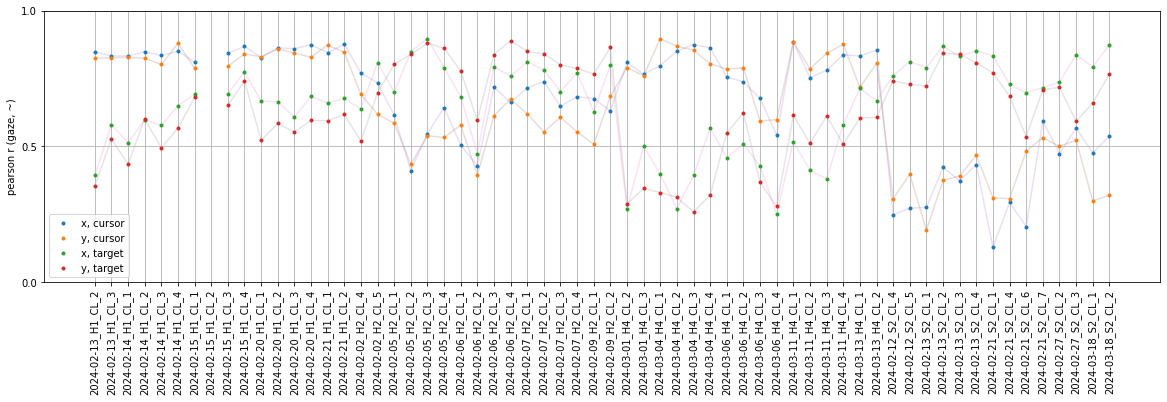

In [24]:
plt.figure(figsize=(20, 5))
plt.plot(rsx, '.', label='x, cursor')
plt.plot(rsy, '.', label='y, cursor')
plt.plot(rsxt, '.', label='x, target')
plt.plot(rsyt, '.', label='y, target')

plt.plot(rsx, alpha=0.2, label='_nolegend_', zorder=-4)
plt.plot(rsy, alpha=0.2, label='_nolegend_', zorder=-4)
plt.plot(rsxt, alpha=0.2, label='_nolegend_', zorder=-4)
plt.plot(rsyt, alpha=0.2, label='_nolegend_', zorder=-4)
_ = plt.xticks(np.arange(len(sessions)), sessions, rotation=90)
plt.grid()
plt.legend()
_ = plt.yticks([0.0, 0.5, 1.0])
plt.ylabel('pearson r (gaze, ~)')

Text(0, 0.5, 'pearson r (gaze, ~)')

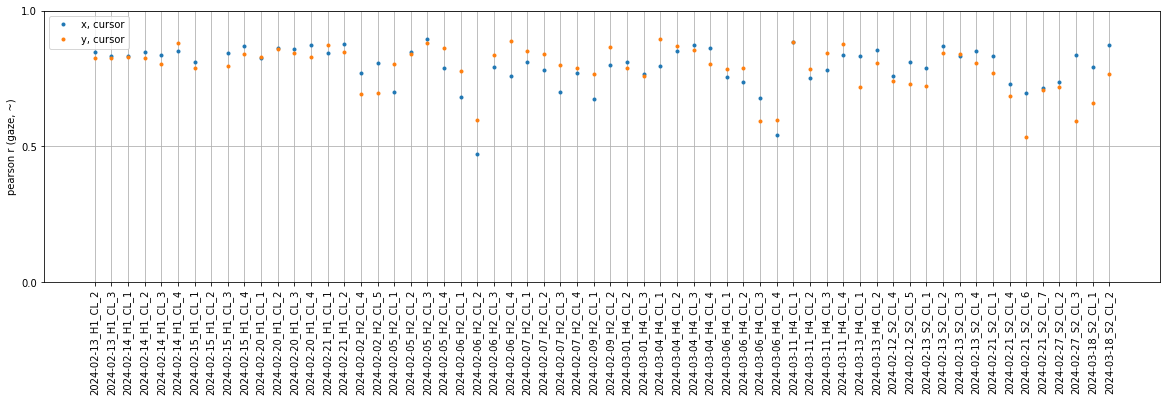

In [25]:
plt.figure(figsize=(20, 5))
plt.plot(np.maximum(rsx, rsxt), '.', label='x, cursor')
plt.plot(np.maximum(rsy, rsyt), '.', label='y, cursor')

#plt.plot(rsx, alpha=0.2, label='_nolegend_', zorder=-4)
#plt.plot(rsy, alpha=0.2, label='_nolegend_', zorder=-4)
_ = plt.xticks(np.arange(len(sessions)), sessions, rotation=90)
plt.grid()
plt.legend()
_ = plt.yticks([0.0, 0.5, 1.0])
plt.ylabel('pearson r (gaze, ~)')

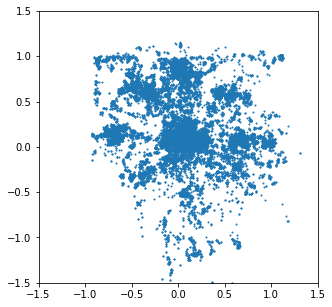

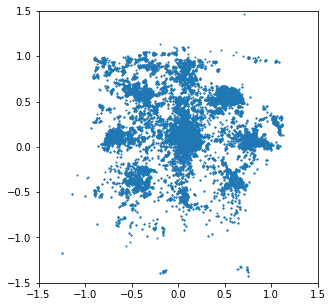

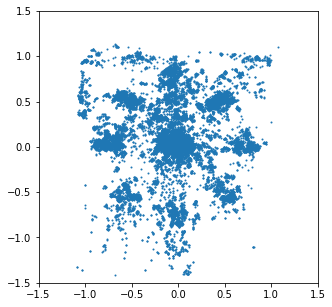

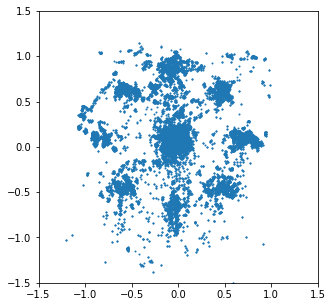

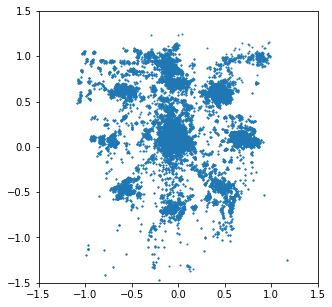

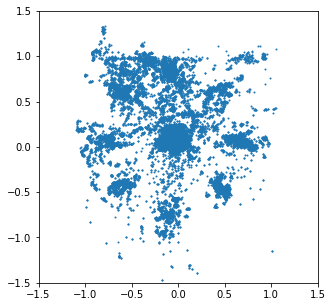

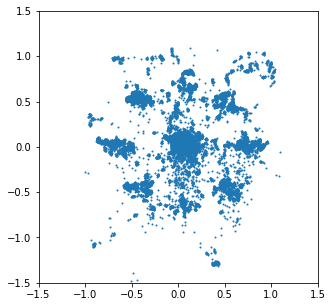

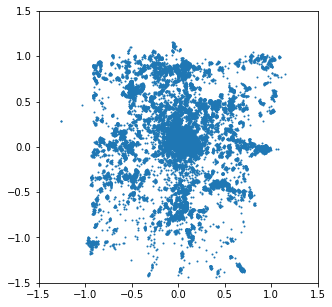

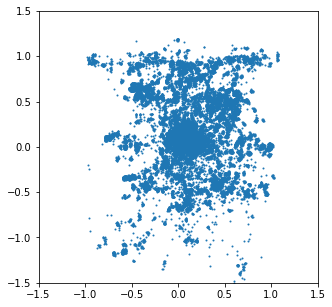

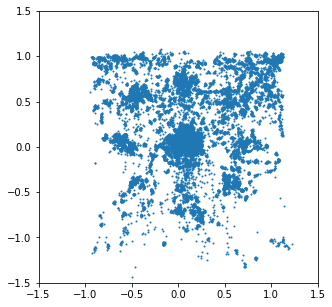

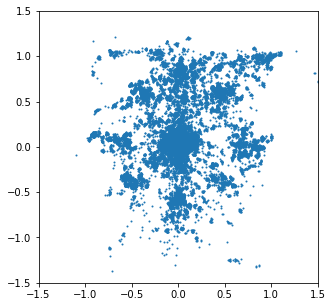

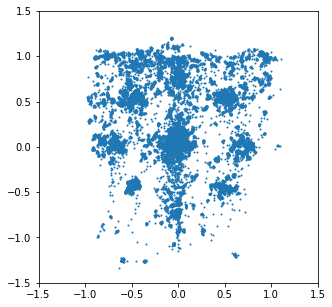

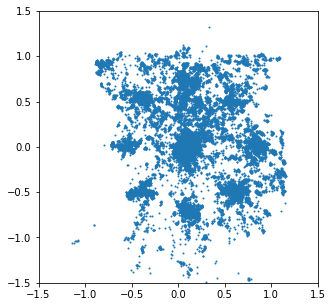

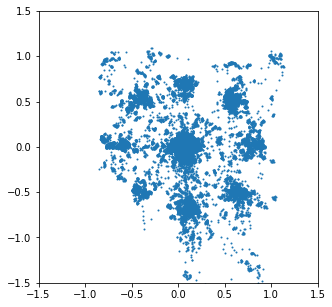

In [13]:
for session in [item for item in sessions if 'S2' in item]:
    task_data = data_util.load_data(datadir / session / 'task.bin')
    gaze_data = data_util.load_data(datadir / session / 'gaze.bin')
    
    
    avg_gaze = 0.5*gaze_data['gaze_buffer'][:, 2:4] + 0.5*gaze_data['gaze_buffer'][:, 17:19]
    
    n_gaze = len(avg_gaze)
    #f = scipy.interpolate.interp1d(np.nonzero(~gaze_is_nan)[0], avg_gaze[~gaze_is_nan], fill_value='extrapolate', axis=0)
    #avg_gaze_interpolated = f(np.arange(len(avg_gaze)))
    
    cursor_pos = task_data['decoded_pos']
    target_pos = task_data['target_pos']
    render_angle = task_data['render_angle']
    rendered_cursor_pos = np.array([cp.reshape((1, 2))@np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]).T for \
                                    cp, theta in zip(cursor_pos, render_angle/180*np.pi)])
    rendered_cursor_pos = rendered_cursor_pos[:, 0, 0, :]
    rendered_target_pos = np.array([tp.reshape((1, 2))@np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]).T for \
                                    tp, theta in zip(target_pos, render_angle/180*np.pi)])
    rendered_target_pos = rendered_target_pos[:, 0, 0, :]
    rendered_target_loc = (4*np.arctan2(rendered_target_pos[:, 1], rendered_target_pos[:, 0])/np.pi).astype('int') % 8
    
    # topleft at xy (492, 91)
    # bottom right at xy (1426, 1025)
    # resolution is (1920, 1080)
    xcent = 0.5*(492 + 1426) / 1920
    xl = 1426 / 1920 - xcent
    ycent = 0.5*(91 + 1025) / 1080
    yl = 91 / 1080 - ycent
    normalized_gaze = np.zeros_like(avg_gaze)
    normalized_gaze[:, 0] = (avg_gaze[:, 0] - xcent)/xl
    normalized_gaze[:, 1] = (avg_gaze[:, 1] - ycent)/yl
    
    dgaze = np.diff(normalized_gaze, axis=0)*60
    dgaze = np.concatenate([dgaze[0:1, :], dgaze], axis=0)
    normalized_gaze_kinematics = np.concatenate([normalized_gaze, dgaze], axis=1) # x, y, dx/dt, dy/dt
    gaze_is_nan = np.isnan(normalized_gaze_kinematics).any(-1)
    
    
    gaze_valid = normalized_gaze[~gaze_is_nan]
    gaze_valid_task_step = gaze_data['task_step'][~gaze_is_nan]
    gaze_valid_rendered_cursor_pos = rendered_cursor_pos[gaze_valid_task_step]
    
    plt.figure(figsize=(5, 5))
    plt.scatter(normalized_gaze[:, 0], normalized_gaze[:, 1], s=1)
    plt.xlim(-1.5, 1.5)
    plt.ylim(-1.5, 1.5)

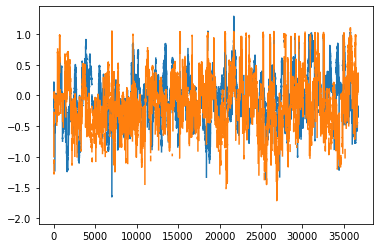

In [18]:
plt.plot(normalized_gaze)

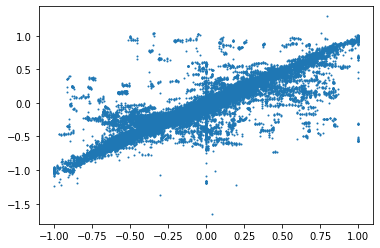

In [22]:
plt.scatter(gaze_valid_rendered_cursor_pos[:, 0], gaze_valid[:, 0], s=1)